# Ensemble Techniques

This file contains various ensembling techniques

# Bagging

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# loading iris dataset provided with sklearn library
# we are to categorize plants in 3 target species with help of 4 features of plant
# features - 1. 'sepal length' 2.sepal width, 3. petal length, 4. petal width
# targets - 1. setosa, 2. versicolor, 3. virginica
data=load_iris()

In [3]:
# explore feature names
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# explore targets
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# loading dataset in dictionary form
d={
    'sepal length':data.data[50:,1],
 'petal width':data.data[50:,2],
    'species':np.array([i for i in data.target if i>0])
}

In [6]:
# Convert dictionary into a pandas dataframe
df=pd.DataFrame(d)

In [7]:
df

,sepal length,petal width,species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [8]:
# now we will shuffle our dataset
df=df.sample(df.shape[0])

In [9]:
df

,sepal length,petal width,species
71,2.8,4.9,2
42,2.6,4.0,1
47,2.9,4.3,1
63,2.5,5.0,2
91,3.1,5.1,2
...,...,...,...
28,2.9,4.5,1
59,3.6,6.1,2
64,2.8,5.1,2
79,3.0,5.8,2


In [10]:
# spliting data into train and test set
df_train=df.iloc[:60,:].sample(10)

In [11]:
df_train

,sepal length,petal width,species
32,2.7,3.9,1
81,3.8,6.4,2
94,3.3,5.7,2
41,3.0,4.6,1
84,2.6,5.6,2
54,3.0,5.8,2
78,2.8,5.6,2
69,2.2,5.0,2
85,3.0,6.1,2
6,3.3,4.7,1


In [12]:
df_test=df.iloc[60:,:]

In [13]:
# 
df_tt=df_test.sample(5,replace=True)
X_test=df_tt.iloc[:,:-1].values
Y_test=df_tt.iloc[:,-1].values

In [14]:
# models> Random Samples

def evaluate(model,X,Y):
    model.fit(X,Y)
    plot_tree(model)
    
    plt.show()
    plot_decision_regions(X,Y,model,legend=2)
    plt.show()
    
    y_pred=model.predict(X_test)
    
    print('Y_test : ', Y_test)
    print('y_pred : ',y_pred)
    
    print('accuracy score : ',accuracy_score(Y_test,y_pred)*100)
    return model

# Bagging

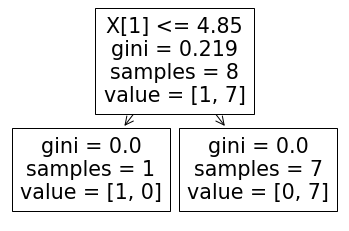

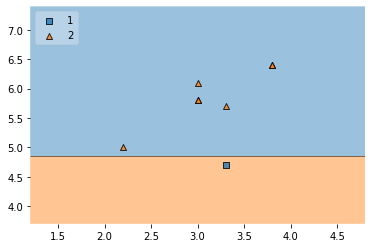

Y_test :  [2 2 2 2 1]
y_pred :  [2 2 2 2 1]
accuracy score :  100.0


In [15]:
# first tree

df_t=df_train.sample(8,replace=True)

X_train=df_t.iloc[:,:-1].values
Y_train=df_t.iloc[:,-1].values

dt=DecisionTreeClassifier()
bag1=evaluate(dt,X_train,Y_train)

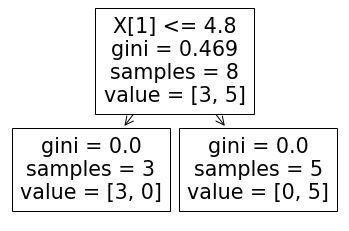

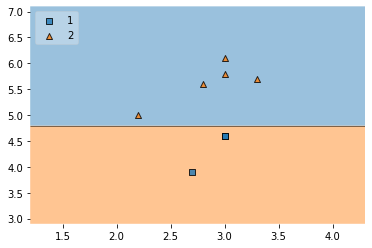

Y_test :  [2 2 2 2 1]
y_pred :  [2 2 2 2 1]
accuracy score :  100.0


In [16]:
# second tree

df_t=df_train.sample(8,replace=True)

X_train=df_t.iloc[:,:-1].values
Y_train=df_t.iloc[:,-1].values

dt=DecisionTreeClassifier()
bag2=evaluate(dt,X_train,Y_train)

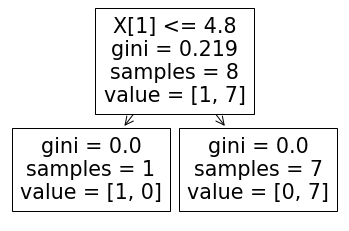

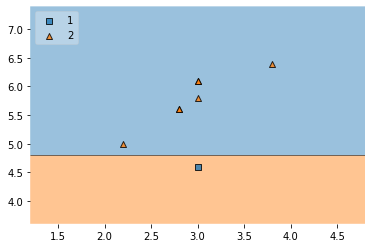

Y_test :  [2 2 2 2 1]
y_pred :  [2 2 2 2 1]
accuracy score :  100.0


In [17]:
# third tree

df_t=df_train.sample(8,replace=True)

X_train=df_t.iloc[:,:-1].values
Y_train=df_t.iloc[:,-1].values

dt=DecisionTreeClassifier()
bag3=evaluate(dt,X_train,Y_train)

In [18]:
# Aggrigation

print('Prediction 1',bag1.predict(np.array([2.5,4.9]).reshape(1,2)))
print('Prediction 2',bag2.predict(np.array([2.5,4.9]).reshape(1,2)))
print('Prediction 3',bag3.predict(np.array([2.5,4.9]).reshape(1,2)))

Prediction 1 [2]
Prediction 2 [2]
Prediction 3 [2]


# Voting/Stacking

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [20]:
m1=KNeighborsClassifier()
m2=LogisticRegression()
m3=MultinomialNB()
m4=GaussianNB()
m5=DecisionTreeClassifier()

In [21]:
from sklearn.ensemble import VotingClassifier

In [22]:
model=VotingClassifier([('knn',m1),('lr',m2),('mn',m3),('gn',m4),('dt',m5)])

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1].values,test_size=0.33,random_state=42)

In [24]:
model.fit(X_train,Y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('mn', MultinomialNB()), ('gn', GaussianNB()),
                             ('dt', DecisionTreeClassifier())])

In [25]:
model.score(X_train,Y_train)*100

94.02985074626866

In [26]:
model.score(X_test,Y_test)*100

90.9090909090909

# Boosting

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
abc=AdaBoostClassifier(n_estimators=4,random_state=0)
abc.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [29]:
Y_pred=abc.predict(X_test)

In [30]:
abc.score(X_test,Y_test)*100

90.9090909090909

In [31]:
accuracy_score(Y_test,Y_pred)*100

90.9090909090909